In [460]:
import os
import re
import glob
import xlrd 
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
from scipy.special import erf
from math import pow
import math
import sys
from scipy import special
from scipy.linalg import eig
import matplotlib.ticker as ticker
import scipy.stats as stats
import pylab as pl
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator


In [461]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rc('axes', linewidth=4)

In [462]:
df = pd.read_excel('Iodine_gas_phase.xlsx', skiprows=3)
df.head()

,gas_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s,gas_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p,gas_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12,gas_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32,gas_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d,gas_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32,gas_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52
0,33219.68369,138.488071,143.907588,133.068554,50.271371,51.130048,49.412695
1,33219.68369,138.488071,143.907588,133.068554,50.271371,51.130048,49.412695
2,33219.68369,138.488071,143.907588,133.068554,50.271371,51.130048,49.412695
3,33219.68369,138.488071,143.907588,133.068554,50.271371,51.130048,49.412695
4,33219.68369,138.488071,143.907588,133.068554,50.271371,51.130048,49.412695


In [463]:
df = pd.read_excel('Iodine_embedded_in_watermolecules_zeroh2o_inactivesystem.xlsx', skiprows=3)
df.head()

,emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s,emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p,emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12,emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32,emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d,emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32,emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52
0,33224.36550,143.313745,148.730186,137.897304,55.111812,55.970825,54.252799
1,33224.21910,143.147533,148.562560,137.732505,54.932085,55.790441,54.073729
2,33224.37840,143.291404,148.710805,137.872003,55.095932,55.952482,54.239382
3,33224.48625,143.415088,148.833554,137.996622,55.211463,56.074421,54.348506
4,33223.85150,142.732626,148.152692,137.312560,54.525220,55.391344,53.659096


[33224.3655  33224.2191  33224.3784  33224.48625 33223.8515  33224.60468
 33224.01079 33224.47762 33219.85625 33224.40023 33219.79518 33220.57935
 33219.7487  33235.28167 33225.07877 33224.85332 33219.09869 33228.03988
 33224.56167 33219.67882]
mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s = 33223.7683185
std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s = 3.5594163627679203


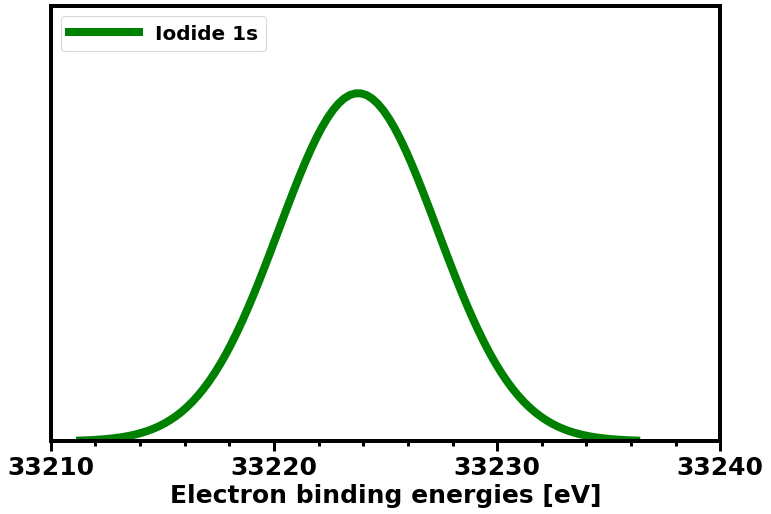

In [464]:
#Iodine interacting with water molecules, cvs-ccsd 1s

emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s = df.emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s

emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s = np.array(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s)
print(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s)

mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s = np.mean(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s)
print("mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s =", mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s)


std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s = np.std(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s)
print("std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s =", std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s)


emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s_BE = np.linspace(mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s - 3.5*std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s + 3.5*std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s_BE, scipy.stats.norm.pdf(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s_BE, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s, std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_1s), color="green", marker='>', markersize=2, linestyle='solid',label='Iodide 1s', linewidth=8)


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
plt.ylim([0.0, 0.14])
plt.xticks(np.arange(33210, 33240.1, 10))
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.gca().axes.get_yaxis().set_visible(False)
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('iodine_with_watermolecules_ccsd_1s.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


[143.313745  143.1475329 143.2914041 143.4150884 142.7326261 143.5569017
 142.8964266 143.4173438 143.0489675 143.2929185 143.9503375 143.91936
 143.9736788 143.9504891 143.8000988 143.7790764 142.844768  143.5577037
 143.481332  143.2981252]
mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p = 143.43339620499998
std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p = 0.37270320778797683


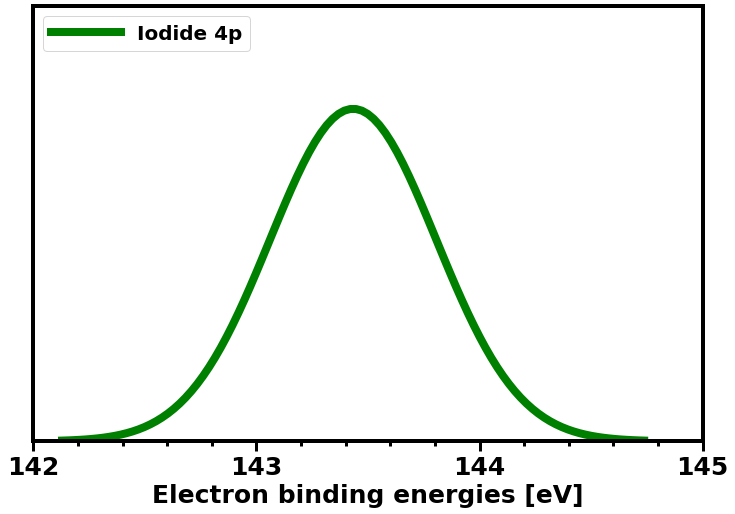

In [465]:
#Iodine interacting with water molecules, cvs-ccsd 4p

emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p = df.emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p

emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p = np.array(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p)
print(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p)

mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p = np.mean(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p)
print("mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p =", mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p)


std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p = np.std(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p)
print("std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p =", std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p)


emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p_BE = np.linspace(mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p - 3.5*std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p + 3.5*std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p_BE, scipy.stats.norm.pdf(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p_BE, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p, std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p), color="green", marker='>', markersize=2, linestyle='solid',label='Iodide 4p', linewidth=8)



plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
plt.ylim([0.0, 1.4])
plt.xticks(np.arange(142, 145.1, 1))
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.gca().axes.get_yaxis().set_visible(False)
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('iodine_with_watermolecules_ccsd_4p.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


[148.7301864 148.5625604 148.7108048 148.8335544 148.1526917 148.9763121
 148.3163425 148.8330625 148.5647658 148.7130573 149.4470439 149.3843562
 149.4622387 149.3920311 149.2373134 149.1990833 148.2976123 149.0024436
 148.9001798 148.6978992]
mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12 = 148.87067696999998
std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12 = 0.3828825620460286


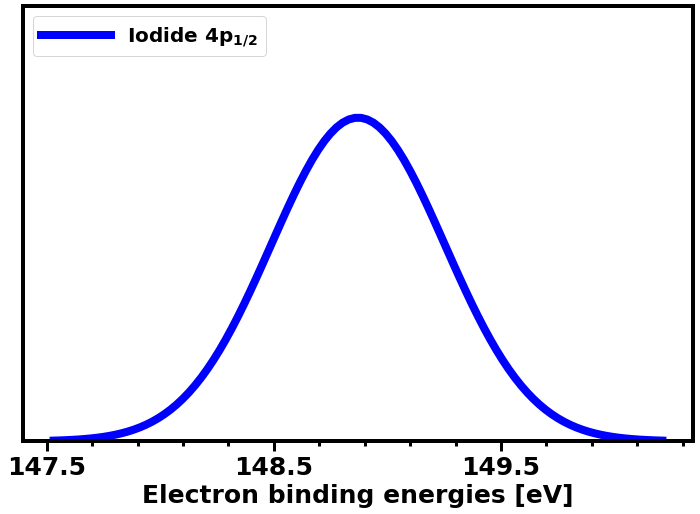

In [466]:
#Iodine interacting with water molecules, cvs-ccsd 4p12

emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12 = df.emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12

emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12 = np.array(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12)
print(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12)

mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12 = np.mean(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12)
print("mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12 =", mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12)


std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12 = np.std(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12)
print("std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12 =", std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12)


emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12_BE = np.linspace(mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12 - 3.5*std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12 + 3.5*std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12_BE, scipy.stats.norm.pdf(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12_BE, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12, std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12), color="blue", marker='>', markersize=2, linestyle='solid',label='Iodide 4p$_{1/2}$', linewidth=8)



plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
plt.ylim([0.0, 1.4])
plt.xticks(np.arange(147.5, 150.5, 1))
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.gca().axes.get_yaxis().set_visible(False)
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('iodine_with_watermolecules_ccsd_4p12.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


0     137.897304
1     137.732505
2     137.872003
3     137.996622
4     137.312560
5     138.137491
6     137.476511
7     138.001625
8     137.533169
9     137.872780
10    138.453631
11    138.454364
12    138.485119
13    138.508947
14    138.362884
15    138.359069
16    137.391924
17    138.112964
18    138.062484
19    137.898351
Name: emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32, dtype: float64
mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32 = 137.99611543
std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32 = 0.36481461657032493


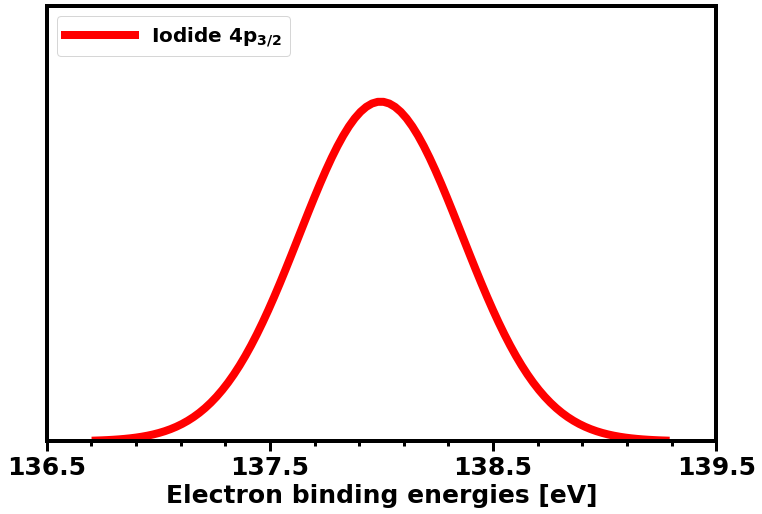

In [467]:
#Iodine interacting with water molecules, cvs-ccsd 4p32

emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32 = df.emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32

emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_432 = np.array(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32)
print(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32)

mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32 = np.mean(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32)
print("mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32 =", mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32)


std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32 = np.std(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32)
print("std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32 =", std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32)


emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32_BE = np.linspace(mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32 - 3.5*std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32 + 3.5*std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32_BE, scipy.stats.norm.pdf(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32_BE, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32, std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32), color="red", marker='>', markersize=2, linestyle='solid',label='Iodide 4p$_{3/2}$', linewidth=8)



plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
plt.ylim([0.0, 1.4])
plt.xticks(np.arange(136.5, 139.7, 1))
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.gca().axes.get_yaxis().set_visible(False)
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('iodine_with_watermolecules_ccsd_4p32.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


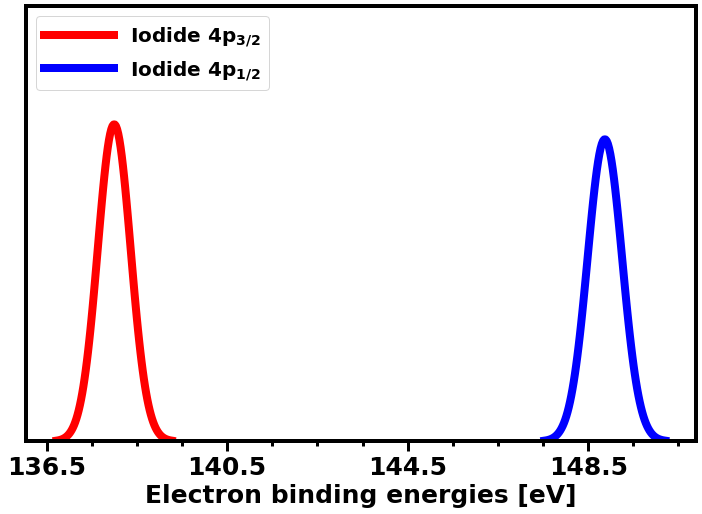

In [468]:
plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)


plt.plot(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32_BE, scipy.stats.norm.pdf(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32_BE, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32, std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32), color="red", marker='>', markersize=2, linestyle='solid',label='Iodide 4p$_{3/2}$', linewidth=8)
plt.plot(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12_BE, scipy.stats.norm.pdf(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12_BE, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12, std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12), color="blue", marker='>', markersize=2, linestyle='solid',label='Iodide 4p$_{1/2}$', linewidth=8)




plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
plt.ylim([0.0, 1.5])
plt.xticks(np.arange(136.5, 150.5, 4))
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.gca().axes.get_yaxis().set_visible(False)

#plt.savefig('iodine_with_watermolecules_ccsd_4p12_32.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


Adjust to plot spin-orbit graph= [139.2901864, 139.1225604, 139.2708048, 139.3935544, 138.7126917, 139.5363121, 138.8763425, 139.3930625, 139.1247658, 139.2730573, 140.0070439, 139.94435620000002, 140.0222387, 139.9520311, 139.7973134, 139.75908330000001, 138.8576123, 139.5624436, 139.4601798, 139.2578992]
139.43067696999998
0.3828825620460286


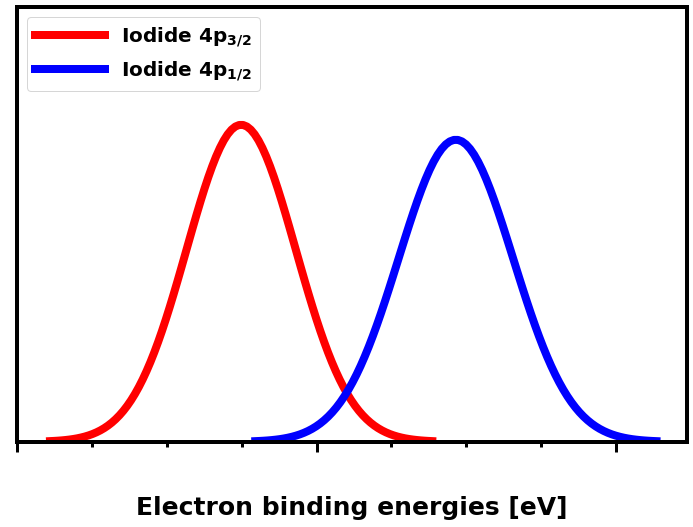

In [469]:
adjust_for_spin_orbit = []

for i in emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p12:
    i-=9.44
    adjust_for_spin_orbit.append(i)
print("Adjust to plot spin-orbit graph=", adjust_for_spin_orbit)


mean_adjust_for_spin_orbit = np.mean(adjust_for_spin_orbit)
std_adjust_for_spin_orbit = np.std(adjust_for_spin_orbit)
print(mean_adjust_for_spin_orbit )
print(std_adjust_for_spin_orbit )


spin_x_12 =  np.linspace(mean_adjust_for_spin_orbit - 3.5*std_adjust_for_spin_orbit, mean_adjust_for_spin_orbit + 3.5*std_adjust_for_spin_orbit, 100)
#print(spin_x_12)


plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32_BE, scipy.stats.norm.pdf(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32_BE, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32, std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4p32), color="red", marker='>', markersize=2, linestyle='solid',label='Iodide 4p$_{3/2}$', linewidth=8)
plt.plot(spin_x_12, scipy.stats.norm.pdf(spin_x_12, mean_adjust_for_spin_orbit, std_adjust_for_spin_orbit), color="blue", marker='>', markersize=2, linestyle='solid',label='Iodide 4p$_{1/2}$', linewidth=8)




plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3, pad=40)
plt.tick_params(axis='x', which='minor', length=5, width=3, pad=15)
plt.ylim([0.0, 1.5])
plt.xticks(np.arange(136.5, 140.7, 2))
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.xaxis.set_ticklabels([])


#plt.savefig('hcl_in_ice_50-0water_ccsd-2p32_12.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()

[55.11181178 54.93208489 55.09593157 55.21146322 54.52521989 55.35721962
 54.68916345 55.21037355 55.08709439 55.08607806 56.03823721 55.69387615
 55.72112797 55.7429248  55.62213517 55.57558368 54.60846433 55.34449521
 55.2773869  55.16686262]
mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d = 55.254876722999995
std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d = 0.3877602484924956


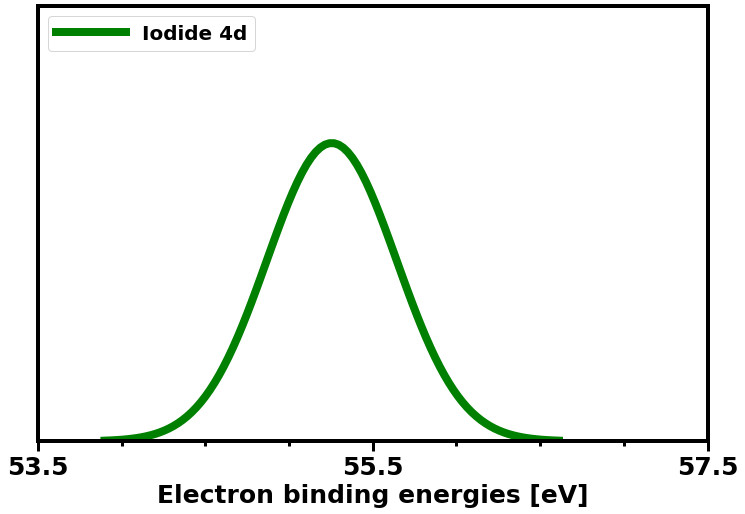

In [470]:
#Iodine interacting with water molecules, cvs-ccsd 4d

emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d = df.emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d

emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d = np.array(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d)
print(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d)

mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d = np.mean(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d)
print("mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d =", mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d)


std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d = np.std(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d)
print("std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d =", std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d)


emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d_BE = np.linspace(mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d - 3.5*std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d + 3.5*std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d_BE, scipy.stats.norm.pdf(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d_BE, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d, std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d), color="green", marker='>', markersize=2, linestyle='solid',label='Iodide 4d', linewidth=8)



plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
plt.ylim([0.0, 1.5])
plt.xticks(np.arange(53.5, 57.6, 2))
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.gca().axes.get_yaxis().set_visible(False)


#plt.savefig('iodine_with_watermolecules_ccsd_4d.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


[55.97082454 55.79044119 55.95248161 56.0744209  55.39134398 56.22467542
 55.55544999 56.06547501 56.22492032 55.95394012 57.16647751 56.58727451
 56.74250129 56.61620388 56.49844202 56.44520941 55.49832403 56.22219105
 56.14102282 55.93085512]
mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32 = 56.152623735999995
std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32 = 0.42843870606734996


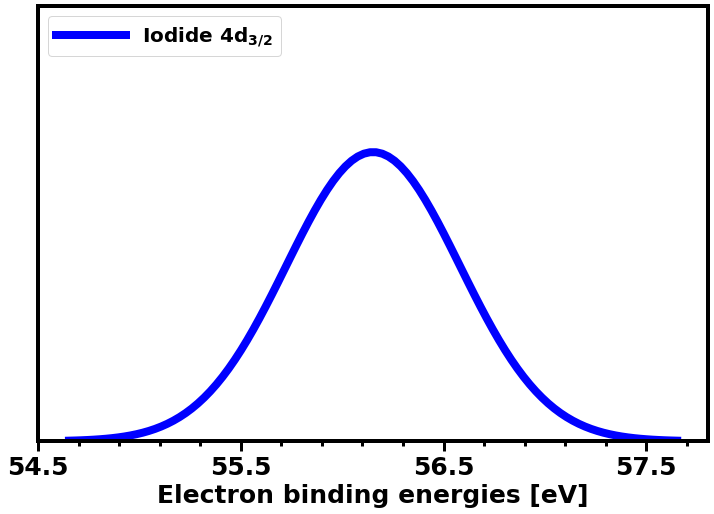

In [471]:
#Iodine interacting with water molecules, cvs-ccsd 4d32

emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32 = df.emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32

emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32 = np.array(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32)
print(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32)

mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32 = np.mean(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32)
print("mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32 =", mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32)


std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32 = np.std(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32)
print("std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32 =", std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32)


emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32_BE = np.linspace(mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32 - 3.5*std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32 + 3.5*std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32_BE, scipy.stats.norm.pdf(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32_BE, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32, std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32), color="blue", marker='>', markersize=2, linestyle='solid',label='Iodide 4d$_{3/2}$', linewidth=8)



plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
plt.ylim([0.0, 1.4])
plt.xticks(np.arange(54.5, 58.2, 1))
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.gca().axes.get_yaxis().set_visible(False)


#plt.savefig('iodine_with_watermolecules_ccsd_4d32.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


[54.25279901 54.07372859 54.23938154 54.34850554 53.65909581 54.48976383
 53.82287691 54.3552721  53.94926847 54.218216   54.9099969  54.8004778
 54.69975465 54.86964571 54.74582832 54.70595794 53.71860463 54.46679937
 54.41375099 54.40287012]
mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52 = 54.3571297115
std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52 = 0.36477063453546227


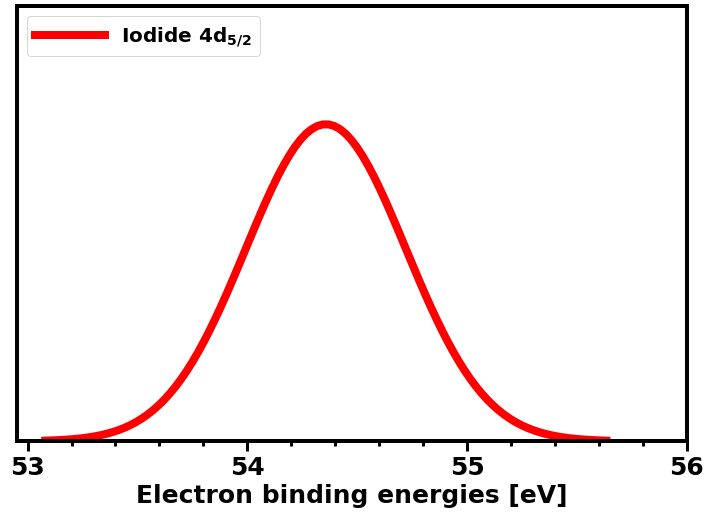

In [472]:
#Iodine interacting with water molecules, cvs-ccsd 4d52

emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52 = df.emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52

emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52 = np.array(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52)
print(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52)

mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52 = np.mean(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52)
print("mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52 =", mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52)


std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52 = np.std(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52)
print("std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52 =", std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52)


emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52_BE = np.linspace(mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52 - 3.5*std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52 + 3.5*std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52_BE, scipy.stats.norm.pdf(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52_BE, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52, std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52), color="red", marker='>', markersize=2, linestyle='solid',label='Iodide 4d$_{5/2}$', linewidth=8)



plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
plt.ylim([0.0, 1.5])
plt.xticks(np.arange(53.0, 56.2, 1))
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.gca().axes.get_yaxis().set_visible(False)


#plt.savefig('iodine_with_watermolecules_ccsd_4d52.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


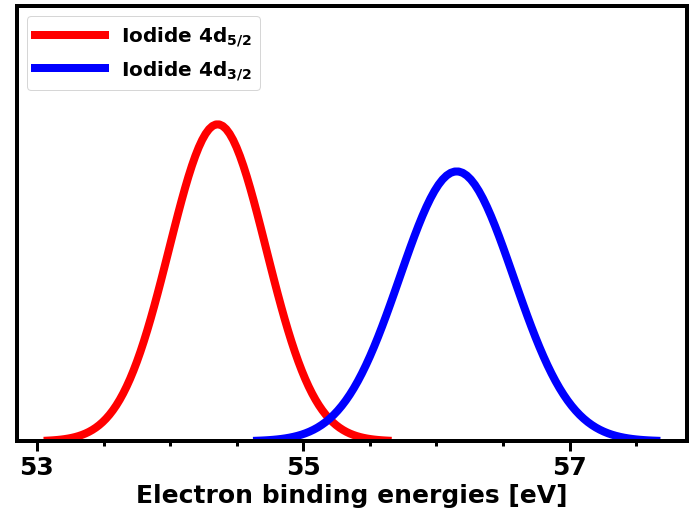

In [473]:
plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)



plt.plot(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52_BE, scipy.stats.norm.pdf(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52_BE, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52, std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d52), color="red", marker='>', markersize=2, linestyle='solid',label='Iodide 4d$_{5/2}$', linewidth=8)
plt.plot(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32_BE, scipy.stats.norm.pdf(emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32_BE, mean_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32, std_emb_eomip_x2cmmf_gaunt_dossss_d_acv3z_CVS_moltra_iodine_4d32), color="blue", marker='>', markersize=2, linestyle='solid',label='Iodide 4d$_{3/2}$', linewidth=8)




plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
plt.ylim([0.0, 1.5])
plt.xticks(np.arange(53.0, 58.2, 2))
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.gca().axes.get_yaxis().set_visible(False)

#plt.savefig('iodine_with_watermolecules_ccsd_4d32_52.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()
